In [ ]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame as pf
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [ ]:
data = fetch_california_housing(as_frame=True)

# data.frame
pandas_data = pd.DataFrame(data.frame)
pandas_data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Explore dataset structure and statistics

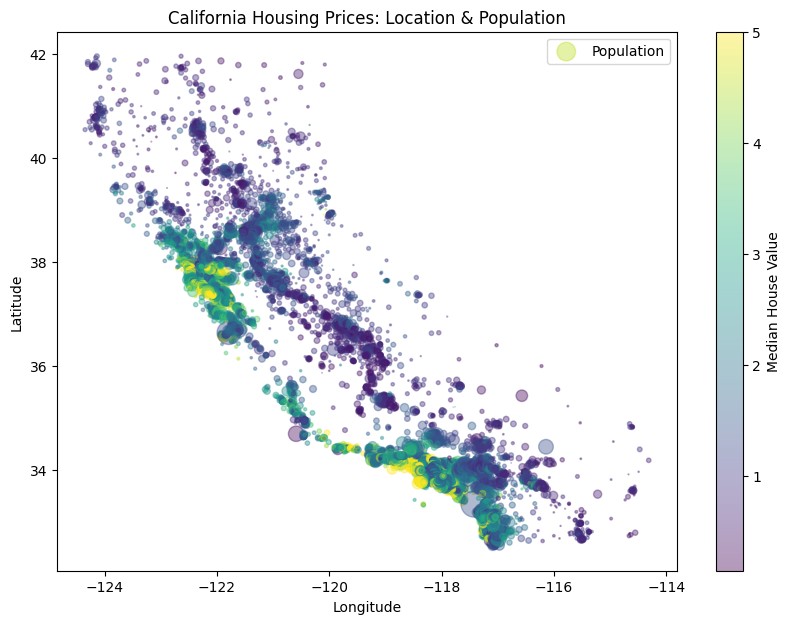

In [ ]:
plt.figure(figsize=(10, 7))

scatter = plt.scatter(x=pandas_data['Longitude'],
                      y=pandas_data['Latitude'],
                      alpha=0.4,
                      label='Population',
                      c=pandas_data['MedHouseVal'],
                      s=pandas_data['Population'] / 100,
                      cmap='viridis'
                    )
plt.colorbar(scatter, label='Median House Value')
plt.title("California Housing Prices: Location & Population")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

### Detect outliers in Population, AveOccup

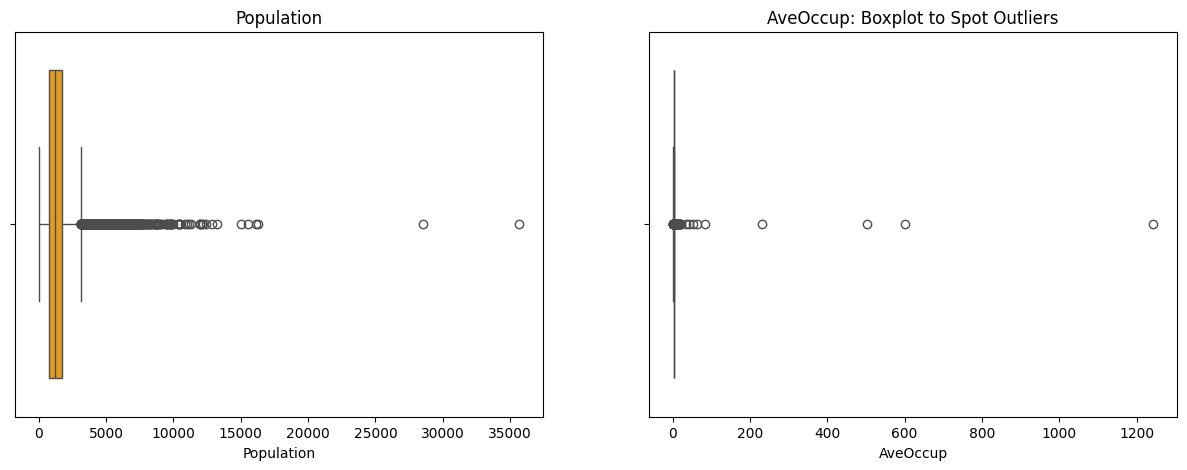

In [ ]:
# visualising the whisker
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=pandas_data['Population'], ax=ax[0], color='orange')
ax[0].set_title('Population')

sns.boxplot(x=pandas_data['AveOccup'], ax=ax[1], color='blue')
ax[1].set_title('AveOccup: Boxplot to Spot Outliers')

plt.show()

In [ ]:
pop_outliers = pandas_data[pandas_data['Population'] > 9000]
occup_outliers = pandas_data[pandas_data['AveOccup'] > 5]

print(f"Total rows: {len(pandas_data)}")
print(f"Population outliers: {len(pop_outliers)}")
print(f"AveOccup outliers: {len(occup_outliers)}")

#display(occup_outliers[['AveOccup', 'Population', 'MedHouseVal']].sort_values(by='AveOccup', ascending=False).head(7))

Total rows: 20640
Population outliers: 37
AveOccup outliers: 345


### Create derived features:
Rooms per person = AveRooms / AveOccup

Bedrooms ratio = AveBedrms / AveRooms

Population density

Distance from city centers (using lat/lon)


In [ ]:
LA_coord = (34.05, -118.24)
SF_coord = (37.77, -122.41)
#Rooms per person = AveRooms / AveOccup
pandas_data['RoomsPerPerson'] = pandas_data['AveRooms'] / pandas_data['AveOccup']


# Bedrooms ratio = AveBedrms / AveRooms
pandas_data['BedroomsRatio'] = pandas_data['AveBedrms'] / pandas_data['AveRooms']

#Population density

pandas_data['PeoplePerRoom'] = pandas_data['AveOccup'] / pandas_data['AveRooms']
#Distance from city centers (using lat/lon)

pandas_data['Dist_to_LA'] = np.sqrt(
    (pandas_data['Latitude'] - LA_coord[0])**2 +
    (pandas_data['Longitude'] - LA_coord[1])**2
)
pandas_data['Dist_to_SF'] = np.sqrt(
    (pandas_data['Latitude'] - SF_coord[0])**2 +
    (pandas_data['Longitude'] - SF_coord[1])**2
)


pandas_data['Dist_to_CityCenter'] = pandas_data[['Dist_to_LA', 'Dist_to_SF']].min(axis=1)

pandas_data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomsPerPerson,BedroomsRatio,PeoplePerRoom,Dist_to_LA,Dist_to_SF,Dist_to_CityCenter
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919,0.146591,0.365909,5.530732,0.210950,0.210950
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685,0.155797,0.338217,5.509673,0.210238,0.210238
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661,0.129516,0.338105,5.517246,0.187883,0.187883
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154,0.184458,0.437991,5.524500,0.178885,0.178885
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646,0.172096,0.347265,5.524500,0.178885,0.178885


Scaling

In [ ]:
scaler = StandardScaler()
features_to_scale = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
                     'AveOccup', 'Latitude', 'Longitude', 'RoomsPerPerson',
                     'BedroomsRatio', 'Dist_to_LA', 'Dist_to_SF']

df_scaled = pandas_data.copy()
df_scaled[features_to_scale] = scaler.fit_transform(pandas_data[features_to_scale])

display(df_scaled.describe().round(3))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomsPerPerson,BedroomsRatio,PeoplePerRoom,Dist_to_LA,Dist_to_SF,Dist_to_CityCenter
count,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000
mean,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,2.069,-0.000,-0.000,0.620,-0.000,0.000,0.903
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.154,1.000,1.000,2.895,1.000,1.000,0.840
min,-1.774,-2.196,-1.852,-1.611,-1.256,-0.229,-1.448,-2.386,0.150,-1.723,-1.949,0.018,-1.094,-1.551,0.000
25%,-0.688,-0.845,-0.399,-0.191,-0.564,-0.062,-0.797,-1.113,1.196,-0.397,-0.649,0.436,-0.963,-1.069,0.228
50%,-0.177,0.029,-0.081,-0.101,-0.229,-0.024,-0.642,0.539,1.797,-0.034,-0.171,0.516,-0.395,0.555,0.580
75%,0.459,0.664,0.252,0.006,0.264,0.020,0.973,0.778,2.647,0.278,0.461,0.657,1.059,0.787,1.439
max,5.858,1.856,55.163,69.572,30.250,119.419,2.958,2.625,5.000,46.462,13.563,392.632,2.988,2.175,4.646


Correlation

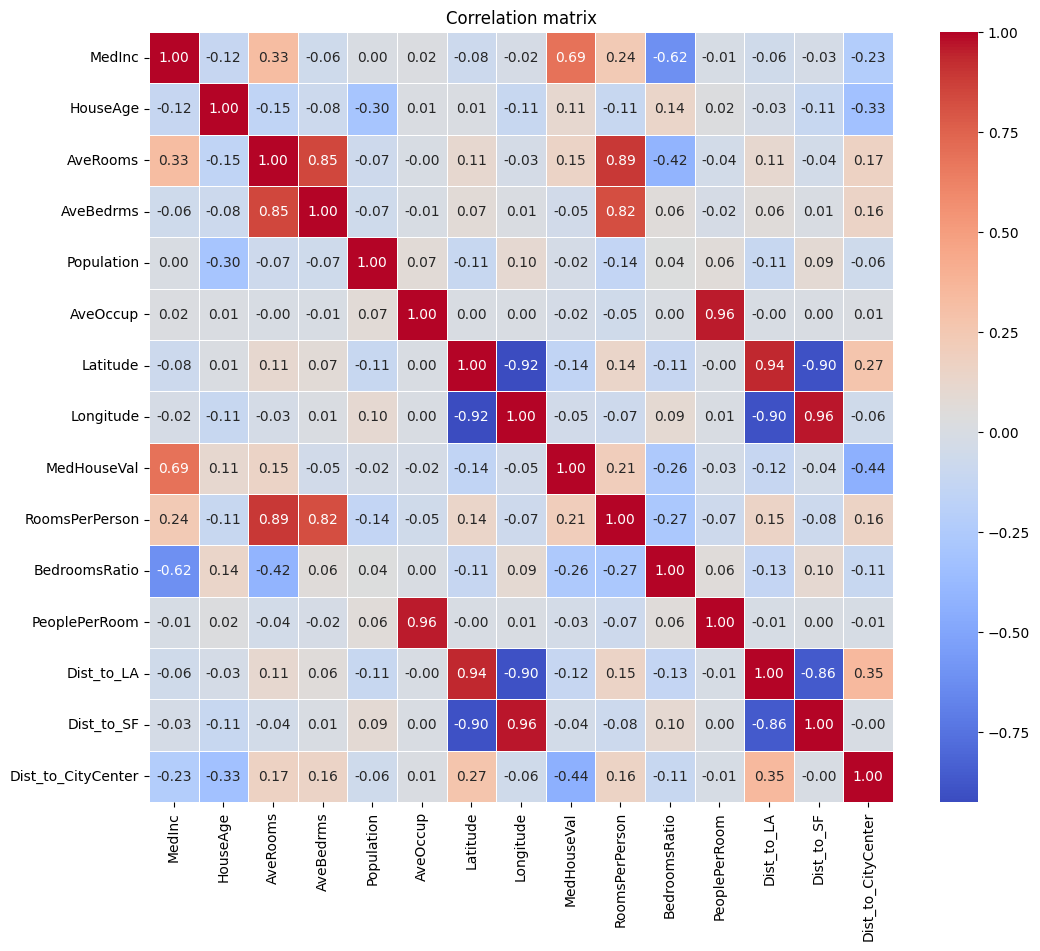

Correlation with price:
MedHouseVal           1.000000
MedInc                0.688075
RoomsPerPerson        0.209482
AveRooms              0.151948
HouseAge              0.105623
AveOccup             -0.023737
Population           -0.024650
PeoplePerRoom        -0.033557
Dist_to_SF           -0.041002
Longitude            -0.045967
AveBedrms            -0.046701
Dist_to_LA           -0.116654
Latitude             -0.144160
BedroomsRatio        -0.255624
Dist_to_CityCenter   -0.438035
Name: MedHouseVal, dtype: float64


In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = df_scaled.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

print("Correlation with price:")
print(corr_matrix['MedHouseVal'].sort_values(ascending=False))